<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Импорт данных

In [ ]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.
   

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates).
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [ ]:
data = data.drop_duplicates()
data.drop('drive_info', axis = 1)
data = data[data['home_cost'] < 17000000]
len(data)
# пропусков 5

5995

# Проверка гипотез

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно.
    

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

In [ ]:
alpha = 0.05
data_home = data['salary'][data['profession'] == 'Homemaker']
data_mark = data['salary'][data['profession'] == 'Marketing']
data_heal = data['salary'][data['profession'] == 'Healthcare']
data_exec = data['salary'][data['profession'] == 'Executive']
statist, p_val = stats.f_oneway(data_home, data_mark, data_heal, data_exec)
if p_val > alpha:
  print('Разницы в зарплатах нет')
else:
  print('Разница есть, зарплаты отличаются')

Разница есть, зарплаты отличаются


<Axes: xlabel='profession', ylabel='salary'>

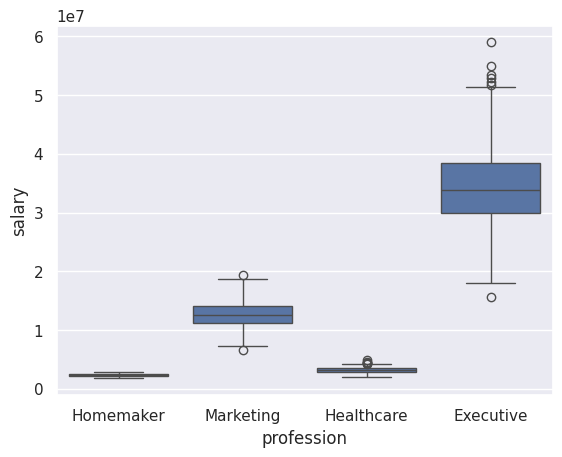

In [ ]:
prep_data = data[data['profession'].isin(['Homemaker', 'Marketing', 'Healthcare', 'Executive'])]
sns.boxplot(data = prep_data, x='profession', y= 'salary')

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

In [ ]:
alpha = 0.05
data_doct = data['salary'][data['profession'] == 'Doctor']
data_ente = data['salary'][data['profession'] == 'Entertainment']
data_lawy = data['salary'][data['profession'] == 'Lawyer']

statist, p_val = stats.kruskal(data_doct, data_ente, data_lawy)
if p_val > alpha:
  print('Разницы в зарплатах нет')
else:
  print('Разница есть, зарплаты отличаются')

Разница есть, зарплаты отличаются


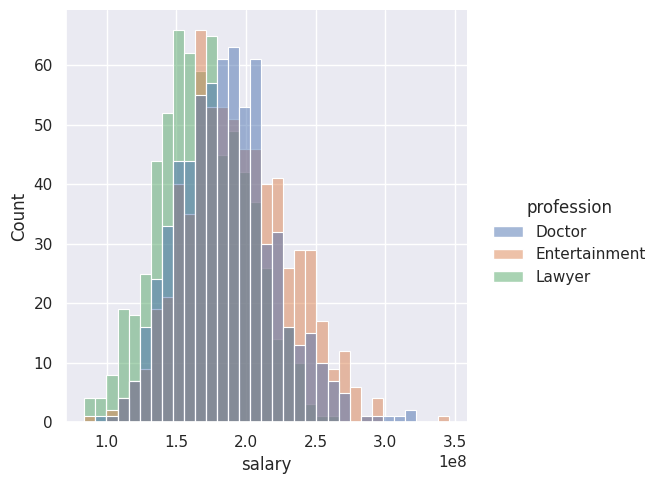

In [ ]:
prep_data = data[data['profession'].isin(['Doctor', 'Entertainment', 'Lawyer'])]
sns.displot(prep_data, x='salary', hue= 'profession')

<div class="alert alert-warning">
    
Допустим вы рассматриваете 4 группы населения, отличающихся количеством  детей. Группы следующие.
* **A** - нет детей
* **B** - 1 ребенок
* **C** - от 2 до 4 детей
* **D** - от 5 детей    
    
    
* Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией

In [ ]:
alpha = 0.05
data_non = data['salary'][data['children'] == 0]
data_low = data['salary'][data['children'] == 1]
data_medi = data['salary'][(data['children'] > 1) & (data['children'] < 5)]
data_hard = data['salary'][data['children'] > 5]
statist, p_val = stats.f_oneway(data_non, data_low, data_medi, data_hard)
if p_val > alpha:
  print('Разницы в зарплатах нет')
else:
  print('Разница есть, зарплаты отличаются')
data_non1 = data['happyness'][data['children'] == 0]
data_low1 = data['happyness'][data['children'] == 1]
data_medi1 = data['happyness'][(data['children'] > 1) & (data['children'] < 5)]
data_hard1 = data['happyness'][data['children'] > 5]
statist, p_val = stats.f_oneway(data_non1, data_low1, data_medi1, data_hard1)
if p_val > alpha:
  print('Разницы в уровне счастья нет')
else:
  print('Разница есть, уровни счастья  отличаются')


Разница есть, зарплаты отличаются
Разница есть, уровни счастья  отличаются


In [ ]:
def children_group(x):
  if x == 0:
    return 'No kids'
  elif x == 1:
    return 'One kid'
  elif x > 1 and x < 5:
    return 'Several kids'
  else:
    return 'A lot of kids'
data['children_gr'] = data['children'].apply(children_group)

<Axes: xlabel='children_gr', ylabel='salary'>

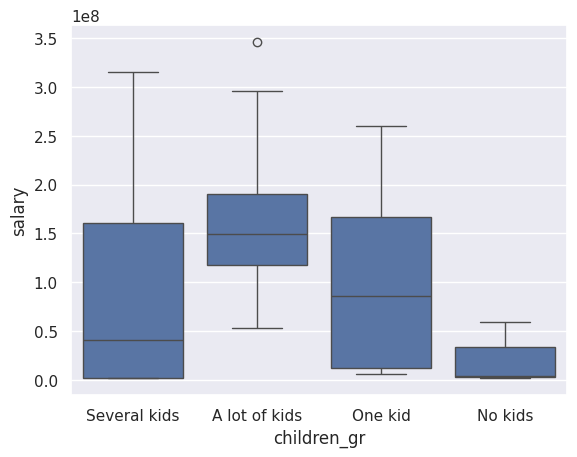

In [ ]:
sns.boxplot(data= data, x='children_gr', y= 'salary')

<Axes: xlabel='children_gr', ylabel='happyness'>

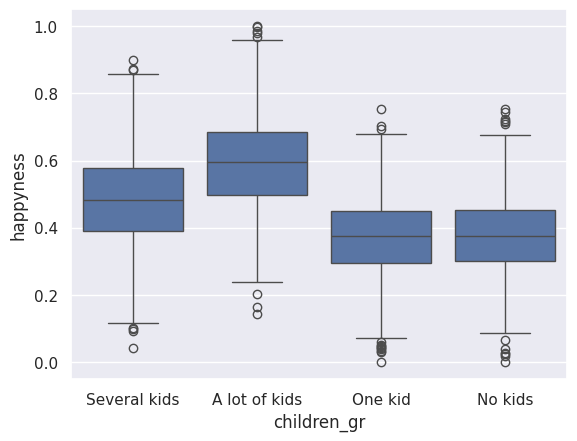

In [ ]:
sns.boxplot(data= data, x='children_gr', y= 'happyness')